<a href="https://colab.research.google.com/github/gowravmannem/Aromatase-Drug-Discovery/blob/main/aromatase_project_part5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 5: Comparing Regressors Model

## Import Libraries

In [ ]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## Loading Data

In [ ]:
aromatase_df = pd.read_csv('aromatase_3class_pIC50_pubchem_fp.csv')

In [ ]:
# assigning X and Y values
aromatase_X = aromatase_df.drop('pIC50', axis=1)
aromatase_Y = aromatase_df.pIC50

## Data pre-proccessing

In [ ]:
# Removing low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
aromatase_X = selection.fit_transform(aromatase_X)
aromatase_X.shape

(2817, 152)

In [ ]:
# Data splitting with 4:1 ratio
aromatase_X_train, aromatase_X_test, aromatase_Y_train, aromatase_Y_test = train_test_split(aromatase_X, aromatase_Y, test_size=0.2)

# Comparing Machine Learning Models

In [ ]:
# building the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
aromatase_train, aromatase_test = clf.fit(aromatase_X_train, aromatase_X_test, aromatase_Y_train, aromatase_Y_test)

100%|██████████| 42/42 [00:34<00:00,  1.22it/s]


In [ ]:
# Performance table to many models on the training datset (80%)
aromatase_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.33,0.51,0.98,0.33
HistGradientBoostingRegressor,0.33,0.51,0.98,2.31
NuSVR,0.29,0.48,1.01,1.46
RandomForestRegressor,0.28,0.47,1.02,2.39
SVR,0.27,0.47,1.02,1.73
GradientBoostingRegressor,0.27,0.47,1.02,1.09
MLPRegressor,0.26,0.46,1.03,3.85
KNeighborsRegressor,0.24,0.44,1.04,0.47
BaggingRegressor,0.23,0.44,1.05,0.39


In [ ]:
# Performance table of many models on the testing datset (20%)
aromatase_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.33,0.51,0.98,0.33
HistGradientBoostingRegressor,0.33,0.51,0.98,2.31
NuSVR,0.29,0.48,1.01,1.46
RandomForestRegressor,0.28,0.47,1.02,2.39
SVR,0.27,0.47,1.02,1.73
GradientBoostingRegressor,0.27,0.47,1.02,1.09
MLPRegressor,0.26,0.46,1.03,3.85
KNeighborsRegressor,0.24,0.44,1.04,0.47
BaggingRegressor,0.23,0.44,1.05,0.39


## Data Visualization and Model Performance

### R_squared Values

[(0.0, 1.0)]

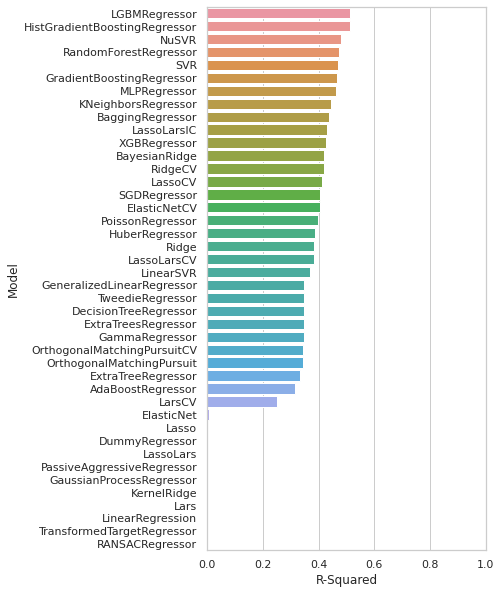

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=aromatase_train.index, x="R-Squared", data=aromatase_train)
ax.set(xlim=(0, 1))

### RSME Values

[(0.0, 10.0)]

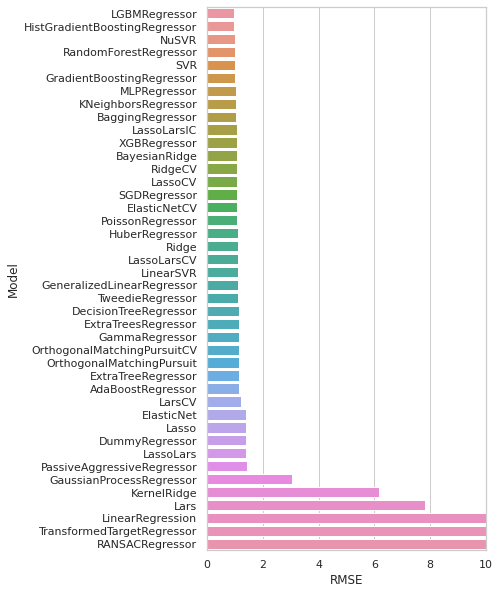

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=aromatase_train.index, x="RMSE", data=aromatase_train)
ax.set(xlim=(0, 10))

### Calculation Times

[(0.0, 10.0)]

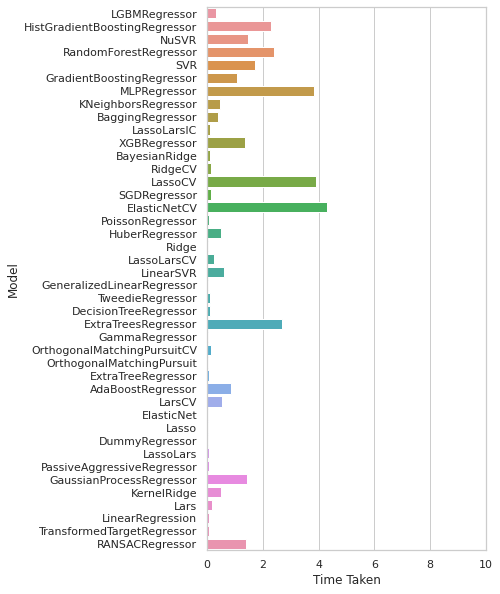

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=aromatase_train.index, x="Time Taken", data=aromatase_train)
ax.set(xlim=(0, 10))